# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

### Alzheimer's Disease Dataset

## WHO
### My background: I have a background in neuroscience from undergrad and it is a large passion of mine. I chose this dataset last year because I studied Alzheimer's in great length throughout my coursework. 
### Audience: This dataset is large, with over 2000 patient entries and 35 columns, facotrs. The factors are split into medical history, clinical measurements, cognitive and functional assessments, symptoms, diagnosis information, and confidential information. With that being said, while it is a lot of data I believe if communicated appropriately anyone can gather useful information from the analysis. There is not a lot of techincal jargon involved such as various protein levels or genetic testing. The data collected is easy to understand and I think conclusions from the data could be used to spread awareness for Alzheimer's symptoms. For example, they could be summarized into an information pamphlet given to family and caretakers of elderly folks. 

## WHAT
### The take-away from this dataset can be helpful statistics for family and caretakers to know to help them care for the elderly.

## How
### An informative pamphlet with a few important statistics, graphs showing diagnostic demographics, and perhaps even illustrations (not to be done in python) showing changes in gait could be presented

# 3. Homework - work with your own data

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os 

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

### Load the data 

In [32]:
pip install kagglehub



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade kagglehub


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
import kagglehub
print("Kagglehub version:", kagglehub.__version__)

Kagglehub version: 0.3.7


In [35]:
alzheimers_dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", alzheimers_dataset_path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [36]:
alzheimers_dataset_path = "/home/codespace/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1"
alzheimers_dataset_path_to_file = os.path.join(alzheimers_dataset_path, "alzheimers_disease_data.csv")  # Corrected filename

# Read the CSV
alzheimers_data_raw = pd.read_csv(alzheimers_dataset_path_to_file)

# Check the first few rows
alzheimers_data_raw.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### EDA

In [38]:
#Making a copy of the df to ensure access to original data in case changes are made
alz_df = alzheimers_data_raw.copy()

In [39]:
alz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [41]:
alz_df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
alz_df.shape

(2149, 35)

In [44]:
#Checking for null values
alz_df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [45]:
# Checking for duplicates
dupes = alz_df[alz_df.duplicated()]
print(dupes)

Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 35 columns]


In [52]:
#Age Ranges
age_range = (alz_df['Age'].min(), alz_df['Age'].max())
print(f"The age range is: {age_range}")

The age range is: (np.int64(60), np.int64(90))


In [47]:
#Checking for Diagnosis representation within the dataset
diagnosis_counts = alz_df['Diagnosis'].value_counts()
print(diagnosis_counts)

Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [48]:
#Checking for Gender representation within the dataset
gender_counts = alz_df['Gender'].value_counts()
print(gender_counts)

Gender
1    1088
0    1061
Name: count, dtype: int64


In [49]:
#Checking for Behavioral Problems representation within the dataset
beh_counts = alz_df['BehavioralProblems'].value_counts()
print(beh_counts)

BehavioralProblems
0    1812
1     337
Name: count, dtype: int64


In [50]:
#Checking for Memory Complaint representation within the dataset
mem_counts = alz_df['MemoryComplaints'].value_counts()
print(mem_counts)

MemoryComplaints
0    1702
1     447
Name: count, dtype: int64


### The dataset does not contain any nulls or duplicates. There is almost equal representation between men(0) and women(1) patients. There are more un-diagnoses(0) than diagnoses(1), and more symptoms(1) than no symptoms(0) across various fields. This makes sense since since symptoms are required to make a diagnosis. However, it would be interesting to determine whether there are diagnosis differences between men and women and which sympotms have a higher correlation with obtaining a diagnosis.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [53]:
import matplotlib.pyplot as plt

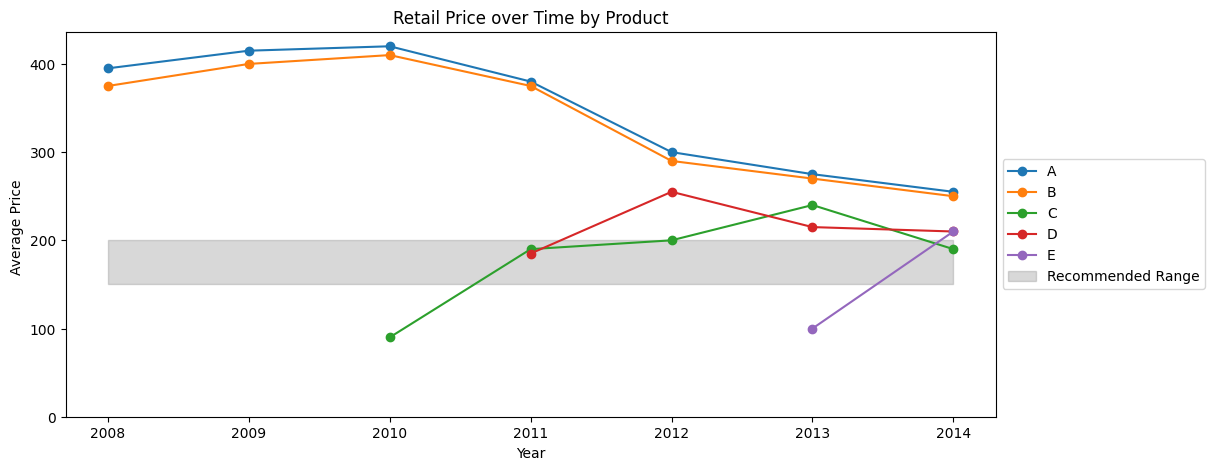

In [64]:
#Data
data4 = {
"Year" : [2008, 2009, 2010, 2011, 2012, 2013, 2014],
"A" : [395, 415, 420, 380, 300, 275, 255],
"B" : [375, 400, 410, 375, 290, 270, 250],
"C" : [None, None, 90, 190, 200, 240, 190],
"D" : [None, None, None, 185, 255, 215, 210],
"E" : [None, None, None, None, None,100, 210]
}

df4 = pd.DataFrame(data4)
df4.interpolate(inplace=True)

#Highlight work
high_min = 150
high_max = 200

#Graphing
fig, ax = plt.subplots(figsize=(12, 5))

for column in df4.columns[1:]:  
    ax.plot(df4["Year"], df4[column], marker="o", linestyle="-", label=column)

ax.fill_between(df4["Year"], high_min, high_max, color='gray', alpha=0.3, label="Recommended Range")
ax.set_xlabel("Year")
ax.set_ylabel("Average Price ")
ax.set_title("Retail Price over Time by Product")
ax.set_xticks(df4["Year"])
ax.set_yticks(np.arange(0, 500, 100))
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()